# Proyecto de Predicción de Ventas en una Cadena de Retail

## Estudiante: Miguel Rodríguez Delgado
- **Programa Académico:** Master en Ciencia de Datos y Análisis
- **Institución:** MIOTI

## Descripción del Proyecto
El objetivo de este proyecto es desarrollar un modelo de predicción de ventas para una cadena de retail utilizando la librería Prophet. Se utilizarán datos históricos de ventas en diferentes categorías para generar predicciones precisas y ayudar a la cadena de retail a planificar su inventario y estrategias de ventas futuras.

## Metodología
1. **Cargar las ventas en un DataFrame:**
   - Utilizaremos la librería Pandas para cargar los datos históricos de ventas en un DataFrame desde el archivo fuente, que puede estar en formato CSV, Excel u otro formato tabular.
   - Nos aseguraremos de verificar la consistencia de los datos, como el formato de fecha, la presencia de valores nulos y la coherencia de las columnas.

2. **Exploración de los datos:**
   - Realizaremos un análisis exploratorio de datos para comprender la estructura y las características de los datos de ventas.
   - Esto incluirá la visualización de estadísticas descriptivas, como la distribución de las ventas, tendencias temporales y patrones estacionales.

3. **Visualización de las categorías:**
   - Utilizaremos herramientas de visualización como Panel y  Seaborn para crear un gráfico dinámico que muestre la distribución de las ventas por categoría.
   - Esto nos ayudará a identificar las categorías más importantes y a entender su contribución al total de ventas.

4. **Realizar una previsión simple sobre las ventas de Cerveza con alcohol en 2021:**
   - Utilizaremos Prophet para realizar una previsión simple de las ventas en el año 2021, sin incluir ningún evento especial.
   - Ajustaremos el modelo Prophet utilizando los datos históricos y generaremos predicciones para el año en curso.

5. **Mejora del modelo de previsión incluyendo algún evento especial:**
   - Identificaremos eventos especiales que puedan haber afectado las ventas de cerveza en el pasado, como días festivos, promociones o cambios en la estrategia de marketing.
   - Añadiremos estos eventos como regresores al modelo Prophet para mejorar la precisión de las predicciones.

6. **Evaluación del modelo:**
   - Evaluaremos el rendimiento del modelo utilizando métricas de evaluación como el error absoluto medio (MAE).
   - Compararemos las predicciones del modelo con los valores reales de ventas para determinar su precisión y fiabilidad.

Al seguir estos pasos, podremos construir un modelo de previsión de ventas robusto y preciso que nos ayude a tomar decisiones informadas y estratégicas en nuestra cadena de retail.

## Tecnologías Utilizadas
- Python
- Bibliotecas empleadas: Pandas, Prophet, Panel
- Herramientas de visualización: Matplotlib, Seaborn

Este proyecto tiene como objetivo proporcionar a la cadena de retail una herramienta poderosa para prever las ventas futuras y tomar decisiones estratégicas basadas en datos. Mediante el uso de técnicas avanzadas de modelado predictivo y la incorporación de fechas especiales relevantes, se espera mejorar la eficiencia operativa y optimizar la gestión del inventario en la cadena de retail.

Tenemos a nuestra disposición datos de ventas de todas las tiendas de una cadena de retail, distribuidas en varias categorías, desde principios de 2018 hasta el final del período de confinamiento estricto. El objetivo principal es llevar a cabo un análisis exhaustivo del impacto que este período ha tenido en las diferentes categorías de productos. Además, queremos plantear escenarios futuros en caso de que se implementen nuevas medidas de confinamiento.

Con esta información valiosa, podemos optimizar la gestión de inventario de productos en las diversas categorías. Esto nos permitirá reaccionar rápidamente ante la implementación de nuevas medidas, adaptando los espacios de almacenamiento en las tiendas y ajustando los pedidos de productos en función de los diferentes escenarios que podamos anticipar.

En resumen, estamos buscando aprovechar estos datos para tomar decisiones informadas que nos ayuden a gestionar de manera eficiente el inventario y a responder de manera ágil a los cambios en el entorno, especialmente en situaciones de confinamiento que pueden afectar significativamente el comportamiento de compra de los clientes.

In [437]:
import pandas as pd  # Importamos pandas para manipulación de datos
import numpy as np  # Importamos numpy para operaciones numéricas
from prophet import Prophet  # Importamos Prophet para el modelado de series temporales
import matplotlib.pyplot as plt  # Importamos matplotlib para visualización de datos
import seaborn as sns # Importamos seaborn para visualización de datos
import panel as pn  # Importa la biblioteca Panel
pn.extension()  # Extiende Panel para habilitar la funcionalidad de widgets interactivos

## 1. Cargar las ventas en un DataFrame

In [438]:
# Cargamos el conjunto de datos desde el archivo CSV y lo almacenamos en un DataFrame
df_datos_categorias = pd.read_csv('Tabla Ventas Cats.csv', sep=';')

# Convertimos la columna de fechas ("Fecha") en formato datetime
df_datos_categorias.Fecha = pd.to_datetime(df_datos_categorias.Fecha)

# Establecemos la columna de fechas como el índice del DataFrame
df_datos_categorias.set_index(df_datos_categorias.Fecha, inplace=True)

# Mostramos el DataFrame para visualizar los datos cargados
df_datos_categorias

,Fecha,Categoría,Unidades,Ventas
Fecha,,,,
2018-01-01,2018-01-01,Aguas sin gas,14.00,7.00
2018-01-01,2018-01-01,Cervezas con alcohol,68.00,45.66
2018-01-01,2018-01-01,Colas,24.00,26.14
2018-01-01,2018-01-01,Utensilios de cocina,36.00,1.91
2018-01-01,2018-01-01,Frutos secos,10.00,13.70
...,...,...,...,...
2020-05-31,2020-05-31,Yogurt saludable,4.00,8.56
2020-05-31,2020-05-31,Papel higiénico,3.00,8.99
2020-05-31,2020-05-31,Patatas,2.00,7.18


In [439]:
df_datos_categorias.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14870 entries, 2018-01-01 to 2020-05-31
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      14870 non-null  datetime64[ns]
 1   Categoría  14870 non-null  object        
 2   Unidades   14870 non-null  float64       
 3   Ventas     14870 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 580.9+ KB


## 2. Exploración de los datos

**P. ¿ Cómo se distribuyen las ventas por categoría ?**

In [440]:
# Agrupamos por categoría y sumamos las unidades vendidas, luego ordenamos por unidades en orden descendente
df_categoria = df_datos_categorias.groupby(by="Categoría")["Unidades"].sum().sort_values(ascending=False).reset_index()
df_ventas = df_datos_categorias.groupby(by="Categoría")["Ventas"].sum().sort_values(ascending=False).reset_index()

# Establecer el formato de visualización para los números de punto flotante
pd.options.display.float_format = '{:.2f}'.format

df = df_categoria.merge(df_ventas, left_on="Categoría", right_on="Categoría")
df

,Categoría,Unidades,Ventas
0,Aguas sin gas,13800766.71,7945479.97
1,Cervezas con alcohol,11369019.04,9448584.03
2,Utensilios de cocina,9714513.84,1273247.06
3,Leche,8620820.40,6917759.44
4,Colas,4832215.85,5225823.90
5,Barras de pan baguette,3134908.67,2650783.90
6,Yogurt saludable,2931009.77,5798649.82
7,Pasta,2802337.30,1947776.84
8,Huevos,2560822.00,4354210.03
9,Barras de pan rústico,2542875.35,2653224.40


In [441]:
# Create a RadioBoxGroup widget for year selection
choice = pn.widgets.RadioBoxGroup(name='Year Choice', options=["Unidades", "Ventas"], inline=False)

In [442]:
def pintar_pie(choice):
    data = df.sort_values(by=choice, ascending = False)
    fig = plt.Figure(figsize=(8,8))
    ax = fig.add_subplot()
    ax.pie(x=data[choice], labels=data.Categoría, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Distribución de {choice} por categoría', pad = 20) 
    ax.axis('equal')  # Asegura que el gráfico de pastel sea un círculo
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout();

    return pn.pane.Matplotlib(fig)

# Define the Panel dynamic function
grafico_dinamico = pn.bind(pintar_pie, choice=choice)


# Create a layout with the year choice widget and dynamic bar plot
layout = pn.Column(choice, grafico_dinamico)

layout.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'412fdeeb-5711-479a-99b7-8f87fe93f5ee': {'version…

<Figure size 640x480 with 0 Axes>

**P. ¿ Cuál es el inicio y el final de datos ?**

In [443]:
print(f"El inicio de los datos es {df_datos_categorias.Fecha.iloc[0]} y el final es {df_datos_categorias.Fecha.iloc[-1]}")

El inicio de los datos es 2018-01-01 00:00:00 y el final es 2020-05-31 00:00:00


**P ¿ De qué categorías tenemos venta ?**

In [444]:
for categoria in df_datos_categorias.Categoría.unique():
    print(categoria)

Aguas sin gas
Cervezas con alcohol
Colas
Utensilios de cocina
Frutos secos
Leche
Huevos
Pizza congelada
Pasta
Caldos y cremas líquidas
Yogurt saludable
Barras de pan baguette
Barras de pan rústico
Papel higiénico
Patatas
Naranjas
Tabletas de chocolate


## 3. Visualización de categorías

Vamos a crear visualizaciones interactivas para analizar la evolución de las ventas a lo largo del tiempo en diferentes categorías de productos. Utilizaremos la biblioteca Panel en Python, que nos permite integrar widgets para seleccionar la categoría que queremos visualizar en el gráfico. 

In [445]:
options = []  # Lista para almacenar las categorías únicas
for categoria in df_datos_categorias.Categoría:  # Itera sobre cada valor en la columna "Categoría"
    if categoria not in options:  # Verifica si la categoría actual no está en la lista "options"
        options.append(categoria)  # Si la categoría no está en la lista, la agrega a "options"
    else:
        pass  # Si la categoría ya está en la lista, no se hace nada y se pasa a la siguiente iteración del bucle

In [446]:
import panel as pn  # Importa la biblioteca Panel
pn.extension()  # Extiende Panel para habilitar la funcionalidad de widgets interactivos

# Definir el widget de selección
select = pn.widgets.Select(name='Categoría', options=options)

In [447]:
def grafico_dinamico_categorias(categoria):
    """
    Genera un gráfico dinámico que muestra la evolución de las ventas de una categoría seleccionada a lo largo del tiempo.

    Parámetros:
    categoria (str): La categoría de productos de la cual se desea visualizar la evolución de las ventas.

    Retorna:
    pn.pane.Matplotlib: Un widget Pane de Matplotlib que contiene el gráfico dinámico.

    """
    # Crear una figura y un eje para el gráfico
    fig = plt.Figure(figsize=(9, 4))
    ax = fig.add_subplot()
    
    # Filtrar el DataFrame para obtener datos de la categoría seleccionada
    df_categoria = df_datos_categorias[df_datos_categorias.Categoría == categoria]
    
    # Utilizar Seaborn para trazar un gráfico de línea de las ventas a lo largo del tiempo
    sns.lineplot(data=df_categoria, x=df_categoria.index, y="Ventas", ax=ax)
    
    # Configurar el título del gráfico
    ax.set_title(f"¿Cómo evolucionan las ventas de la categoría {categoria}?")

    # Devolver el gráfico como un widget Pane de Matplotlib
    return pn.pane.Matplotlib(fig)

# Vincular la función grafico_dinamico_categorias() con el widget de selección 'select' para crear un gráfico dinámico
grafico_dinamico = pn.bind(grafico_dinamico_categorias, categoria=select)

# Crear un diseño de Panel que incluya el widget de selección y el gráfico dinámico
layout = pn.Column(select, grafico_dinamico)

# Mostrar el diseño en la interfaz gráfica
layout

BokehModel(combine_events=True, render_bundle={'docs_json': {'49a9a271-b2bc-45df-b32a-08c3adcc9dd9': {'version…

## 4. Realizar una previsión simple sobre las ventas en 2021

En este paso inicial, vamos a realizar una predicción inicial de las ventas para la categoría "Cervezas con alcohol" hasta finales de 2021. La idea es observar la reacción del modelo sin incorporar ningún evento especial o fecha específica adicional. Esto nos permitirá comprender cómo se comporta el modelo cuando no se le proporciona información adicional. 


In [448]:
# Filtramos el DataFrame por los valores de la categoría Cervezas con alcohol.
df_cerveza = df_datos_categorias[df_datos_categorias.Categoría == "Cervezas con alcohol"]

Para la previsión vamos a utilizar la librería Prophet. https://facebook.github.io/prophet/

Es una biblioteca desarrollada por Facebook para realizar análisis de series temporales, en la que se espera que las columnas que representan la fecha de los datos y la variable que se está modelando tengan nombres específicos por convención. La columna que contiene la fecha debe llamarse "ds" y la columna que contiene los valores que se están modelando debe llamarse "y".

Esta convención se estableció para facilitar el uso de Prophet y garantizar una interfaz consistente y sencilla para los usuarios. Al seguir esta convención, Prophet puede identificar automáticamente qué columnas utilizar en el modelo sin necesidad de especificarlas explícitamente, lo que simplifica el proceso de modelado de series temporales.

Además de mejorar la usabilidad, esta convención ayuda a mantener el código más legible y comprensible, ya que otros usuarios pueden entender rápidamente qué columnas se están utilizando en el modelo sin necesidad de revisar la documentación detallada.

En resumen, aunque es posible cambiar los nombres de las columnas en los datos de entrada, seguir la convención de nomenclatura de Prophet ("ds" para la fecha y "y" para los valores a predecir) facilita el uso de la biblioteca y mejora la legibilidad del código.

In [449]:
# Se renombran las columnas "Fecha" y "Ventas" a "ds" e "y" respectivamente, siguiendo la convención de Prophet.
df_cerveza = df_cerveza.rename(columns={"Fecha":"ds", "Ventas":"y" }).reset_index()

# Se seleccionan solo las columnas "ds" (fecha) e "y" (ventas) del DataFrame.
df_cerveza = df_cerveza[["ds","y"]]

# Se muestra una vista previa de las primeras filas del DataFrame modificado.
df_cerveza.head()

,ds,y
0,2018-01-01,45.66
1,2018-01-02,8279.95
2,2018-01-03,7933.10
3,2018-01-04,9318.25
4,2018-01-05,13993.16


In [450]:
df_cerveza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      877 non-null    datetime64[ns]
 1   y       877 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.8 KB


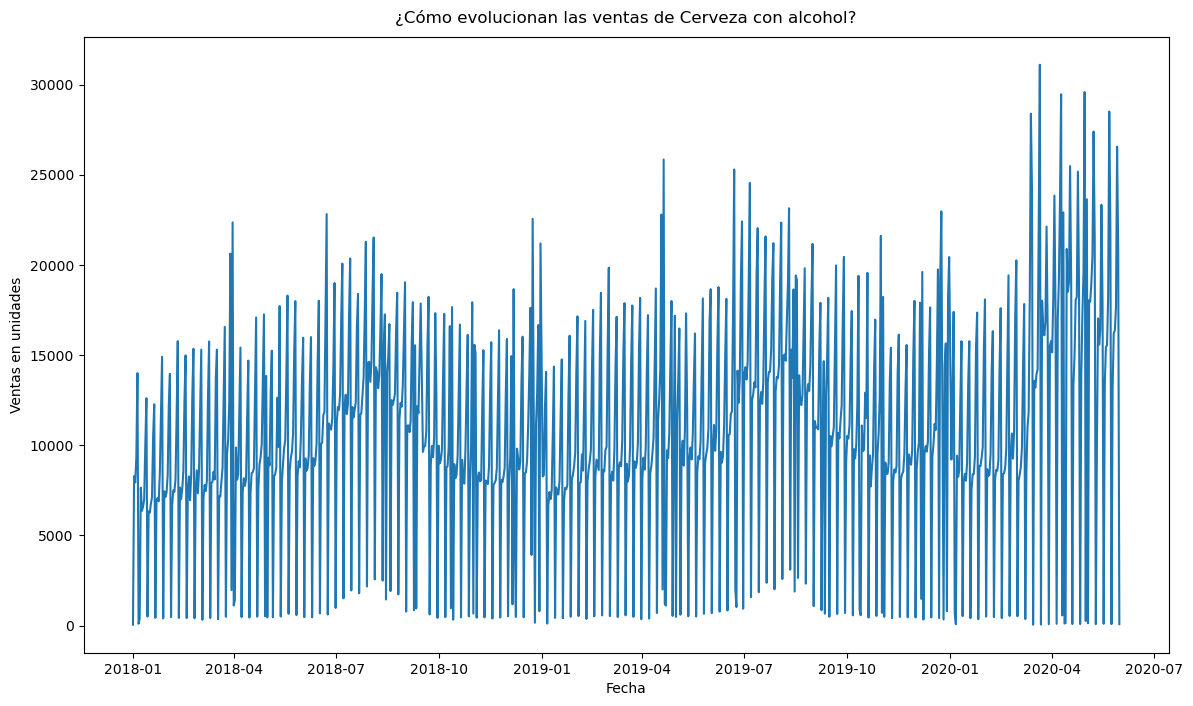

In [451]:
## Representamos nuestra serie temporal
fig, ax = plt.subplots(figsize = (14, 8))
ax.plot(df_cerveza["ds"], df_cerveza["y"])

ax.set_ylabel('Ventas en unidades')
ax.set_xlabel('Fecha')

ax.set_title("¿Cómo evolucionan las ventas de Cerveza con alcohol?", pad = 10);


In [452]:
# Se crea una instancia del modelo Prophet, con la opción weekly_seasonality=False para desactivar la estacionalidad semanal.
modelo = Prophet(weekly_seasonality=False)

# Se ajusta el modelo a los datos de ventas de cerveza representados en el DataFrame df_cerveza.
modelo.fit(df_cerveza)

20:42:08 - cmdstanpy - INFO - Chain [1] start processing
20:42:08 - cmdstanpy - INFO - Chain [1] done processing


In [453]:
# Se genera un DataFrame con fechas futuras utilizando el modelo Prophet, con un total de 580 periodos adicionales.
futuro = modelo.make_future_dataframe(periods=580)

Al llamar al método make_future_dataframe() del modelo Prophet, se generan las fechas futuras basadas en el último registro de fecha presente en el DataFrame df_cerveza y se agregan el número especificado de períodos adicionales. En este caso, se están generando 580 períodos adicionales de acuerdo con el argumento periods=580. Estas fechas futuras se utilizarán luego para hacer predicciones con el modelo entrenado.

In [454]:
# Se generan predicciones utilizando el modelo Prophet para las fechas futuras contenidas en el DataFrame 'futuro'.
prevision = modelo.predict(futuro)

Al llamar al método predict() del modelo Prophet y pasarle el DataFrame futuro, se generan las predicciones para las fechas futuras especificadas en el DataFrame futuro. El DataFrame resultante, prevision, contendrá las predicciones, así como otras columnas con intervalos de confianza y otros detalles sobre las predicciones.

In [455]:
prevision.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1452,2021-12-28,18317.90,10018.92,25255.64,17871.14,18740.48,-510.67,-510.67,-510.67,-510.67,-510.67,-510.67,0.00,0.00,0.00,17807.23
1453,2021-12-29,18326.04,10000.34,24231.09,17878.30,18749.51,-640.06,-640.06,-640.06,-640.06,-640.06,-640.06,0.00,0.00,0.00,17685.98
1454,2021-12-30,18334.18,9188.42,24777.68,17885.46,18758.63,-784.00,-784.00,-784.00,-784.00,-784.00,-784.00,0.00,0.00,0.00,17550.18
1455,2021-12-31,18342.33,9801.13,24729.99,17892.62,18768.10,-940.24,-940.24,-940.24,-940.24,-940.24,-940.24,0.00,0.00,0.00,17402.09
1456,2022-01-01,18350.47,9746.75,25374.80,17899.78,18777.56,-1106.27,-1106.27,-1106.27,-1106.27,-1106.27,-1106.27,0.00,0.00,0.00,17244.20


 ¿Qué significan las columnas?

- **ds**: Esta columna representa las fechas para las cuales se realizaron las predicciones.

- **trend**: La tendencia general de la serie temporal, que muestra la dirección general en la que se mueven los datos a lo largo del tiempo.

- **yhat_lower** y **yhat_upper**: Estas columnas representan los límites inferior y superior de las predicciones. Indican el rango dentro del cual se espera que se encuentren los valores reales con cierto nivel de confianza (por defecto, el 80%).

- **additive_terms**, **additive_terms_lower**, **additive_terms_upper**: Estas columnas contienen los términos aditivos del modelo. Representan los efectos adicionales que no están explicados por la tendencia ni por la estacionalidad, como las vacaciones o eventos especiales.

- **yearly**, **yearly_lower**, **yearly_upper**: Estas columnas muestran los efectos estacionales anuales, como las fluctuaciones que ocurren regularmente de un año a otro.

- **yhat**: Esta columna representa la predicción puntual de la variable objetivo (en este caso, las ventas de cerveza) para cada fecha en ds.

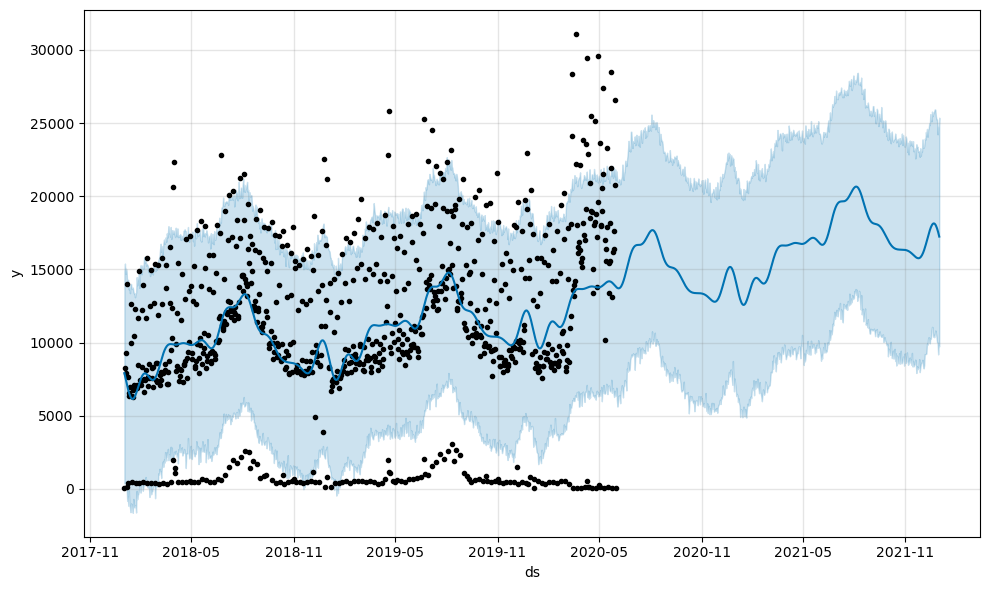

In [456]:
# Se genera una visualización de las predicciones utilizando el método plot() del modelo Prophet.
modelo.plot(prevision);

Al llamar al método plot() del modelo Prophet y pasarle las predicciones (prevision), se generará una gráfica que muestra las predicciones junto con los datos originales (si están disponibles) y los intervalos de confianza. Esta visualización es útil para comprender cómo se comparan las predicciones del modelo con los datos históricos y para evaluar la incertidumbre asociada con las predicciones.

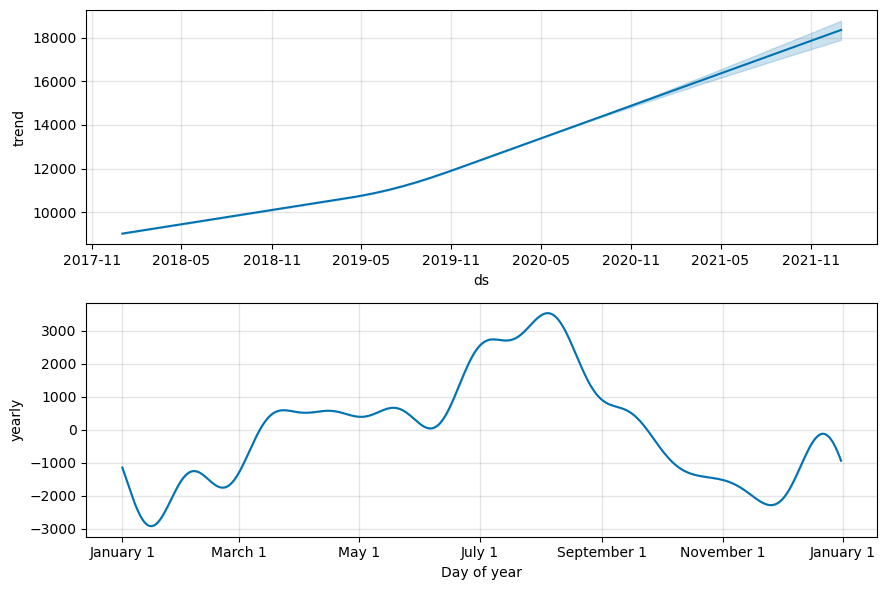

In [457]:
# Se genera una visualización de los componentes de las predicciones utilizando el método plot_components() del modelo Prophet.
modelo.plot_components(prevision);

Al llamar al método plot_components() del modelo Prophet y pasarle las predicciones (prevision), se generarán gráficos separados para los componentes principales del modelo, incluida la tendencia, la estacionalidad y cualquier efecto aditivo que se haya especificado. Esta visualización es útil para comprender cómo cada componente contribuye a las predicciones generales y para identificar patrones estacionales o tendencias en los datos.

**¿Cómo han sido las previsiones?**

Las previsiones muestran que el modelo ha capturado correctamente la tendencia ascendente en las ventas de cerveza. Sin embargo, parece no haber detectado los picos asociados a la estacionalidad o a eventos especiales. Esto sugiere que el modelo podría necesitar ajustes adicionales para mejorar su capacidad de capturar estos patrones específicos en los datos de ventas.

## 5. Mejora del modelo de previsión incluyendo algún evento especial.

Para mejorar nuestro modelo y permitir una mejor separación entre las contribuciones de la estacionalidad y los eventos externos, hemos decidido incluir una lista de holidays que representan eventos relevantes. Aquí tenemos algunas sugerencias:

1. **COVID-19 Lockdown (Confinamiento por COVID-19)**:
   - Fecha: Marzo de 2020 a mayo de 2020

2. **Navidad**:
   - Fecha: 25 de diciembre de cada año

3. **Fines de semana**
   - Fecha: Días 5 al 7 de cada semana.

4. **Final de la Champions League**
   - Fecha: Mayo o Junio de cada año

5. **Oktoberfest**:
   - Fecha: Septiembre a octubre de cada año

6. **Día de San Patricio**:
   - Fecha: 17 de marzo de cada año

7. **Verano**
   - Fecha: Desde el 21 de Junio de cada año.

Al incluir estas fechas especiales con sus respectivos tags, nuestro modelo podrá distinguir mejor entre los efectos de la estacionalidad y los eventos externos en las predicciones de ventas de cerveza.

Después de incorporar estas fechas especiales, compararemos las predicciones y componentes del nuevo modelo con el modelo anterior que no tenía en cuenta eventos especiales. Esto nos permitirá evaluar cómo las inclusiones de fechas especiales afectan las predicciones y la capacidad de nuestro modelo para capturar diferentes contribuciones a las ventas de cerveza.

#### Confinamiento por COVID.

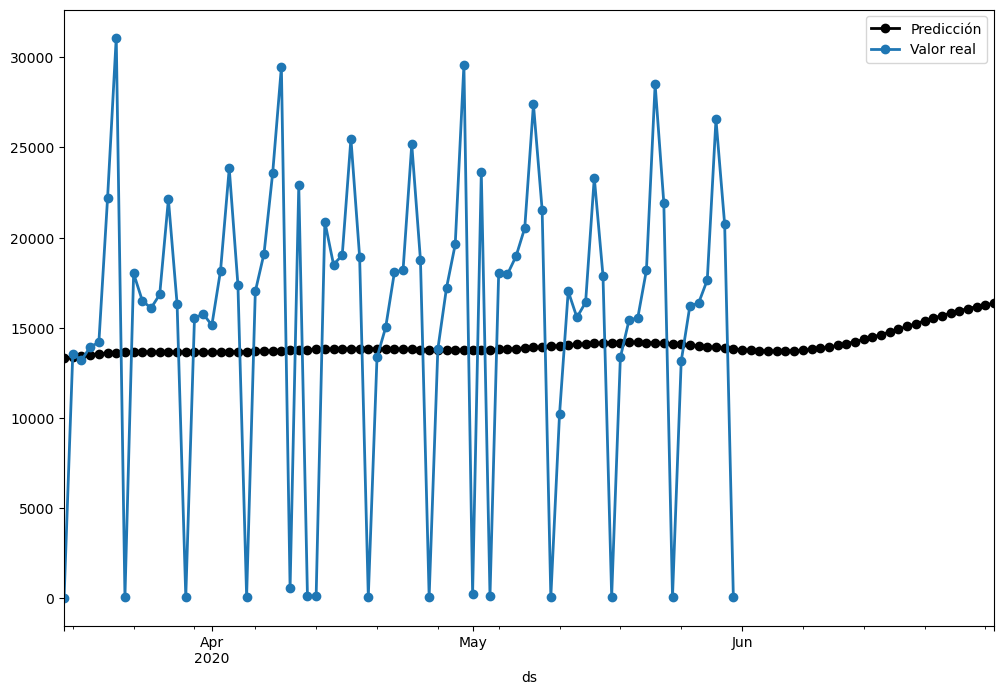

In [458]:
# Seleccionamos el período durante el confinamiento para las predicciones
prevision_zoom = prevision[(prevision.ds >= '2020-03-15') & (prevision.ds <= '2020-06-30')]

# Seleccionamos el período durante el confinamiento para los valores reales de las ventas
ventas_df_zoom = df_cerveza[(df_cerveza.ds >= '2020-03-15') & (df_cerveza.ds <= '2020-06-30')]

# Creamos la figura para el gráfico
plt.figure(figsize=(12, 8))

# Representamos las predicciones durante el período de confinamiento
prevision_zoom.set_index('ds')['yhat'].plot(label='Predicción', lw=2, marker='o', color='k')

# Representamos los valores reales durante el período de confinamiento
ventas_df_zoom.set_index('ds')['y'].plot(label='Valor real', lw=2, marker='o')

# Agregamos la leyenda al gráfico
plt.legend();

El modelo no está detectando los picos por lo que a continuación se incluirán las fechas del confinamiento para que el  modelo tenga en cuenta este evento específico al realizar las predicciones. 

In [459]:
covid = pd.DataFrame({
  'holiday': 'covid',
  'ds': pd.to_datetime(['2020-03-15']),
  'lower_window': 0,
  'upper_window': 100
})

¿Qué significa cada elemento del DataFrame?

- 'holiday': Esta columna indica el nombre del día festivo o evento especial. En este caso, el valor es 'covid', lo que representa el confinamiento debido a la pandemia de COVID-19.

- 'ds': Esta columna contiene las fechas asociadas con el evento especial. En este caso, se ha establecido en el 15 de marzo de 2020, que es la fecha de inicio del confinamiento.

- 'lower_window': Este parámetro indica cuántos días antes de la fecha especificada en 'ds' se debe considerar el efecto del evento especial. Aquí se ha establecido en 0, lo que significa que el efecto del confinamiento comienza exactamente en la fecha del 15 de marzo de 2020.

- 'upper_window': Este parámetro indica cuántos días después de la fecha especificada en 'ds' se debe considerar el efecto del evento especial. Aquí se ha establecido en 100 días, lo que significa que el efecto del confinamiento se extiende durante 100 días adicionales después del 15 de marzo de 2020. Esto se hace para capturar posibles efectos residuales del confinamiento en las ventas de cerveza durante un período prolongado después de que el confinamiento haya terminado.

In [460]:
# Se crea una nueva instancia del modelo Prophet, con la opción weekly_seasonality=False para desactivar la estacionalidad semanal,
# growth='linear' para especificar un crecimiento lineal y holidays=covid para incluir el efecto del confinamiento por COVID-19.
modelo_covid = Prophet(weekly_seasonality=False, growth='linear', holidays=covid)

# Se ajusta el nuevo modelo a los datos de ventas de cerveza representados en el DataFrame df_cerveza, teniendo en cuenta el efecto del confinamiento.
modelo_covid.fit(df_cerveza)

# Se genera un nuevo DataFrame con fechas futuras utilizando el modelo Prophet, con un total de 580 períodos adicionales.
futuro_covid = modelo_covid.make_future_dataframe(periods=580)

20:42:14 - cmdstanpy - INFO - Chain [1] start processing
20:42:14 - cmdstanpy - INFO - Chain [1] done processing


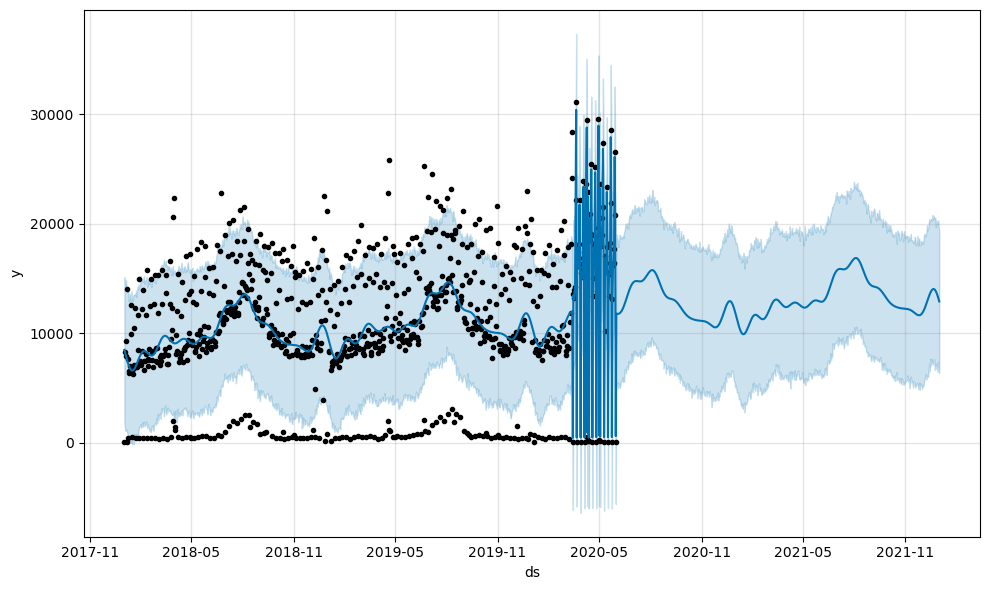

In [461]:
# Se generan las predicciones utilizando el modelo Prophet ajustado para las fechas futuras contenidas en el DataFrame 'futuro'.
prevision_covid = modelo_covid.predict(futuro_covid)

# Se genera una visualización de las predicciones utilizando el método plot() del modelo Prophet.
modelo_covid.plot(prevision_covid);

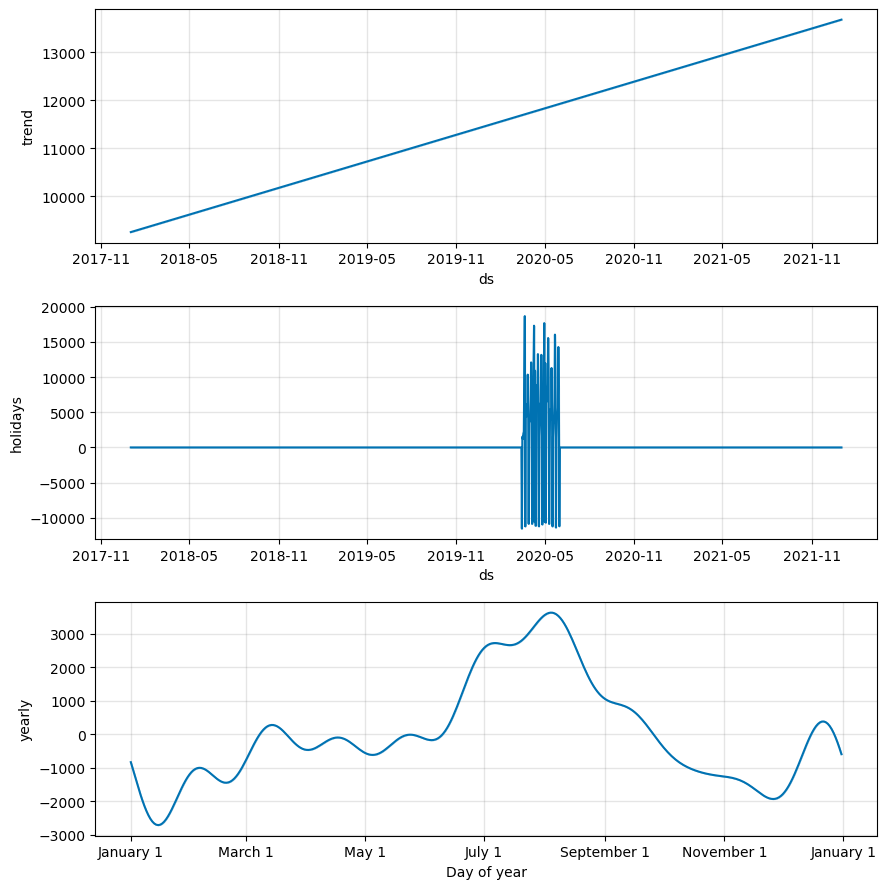

In [462]:
# Se genera una visualización de los componentes del modelo Prophet ajustado utilizando el método plot_components().
modelo_covid.plot_components(prevision_covid);

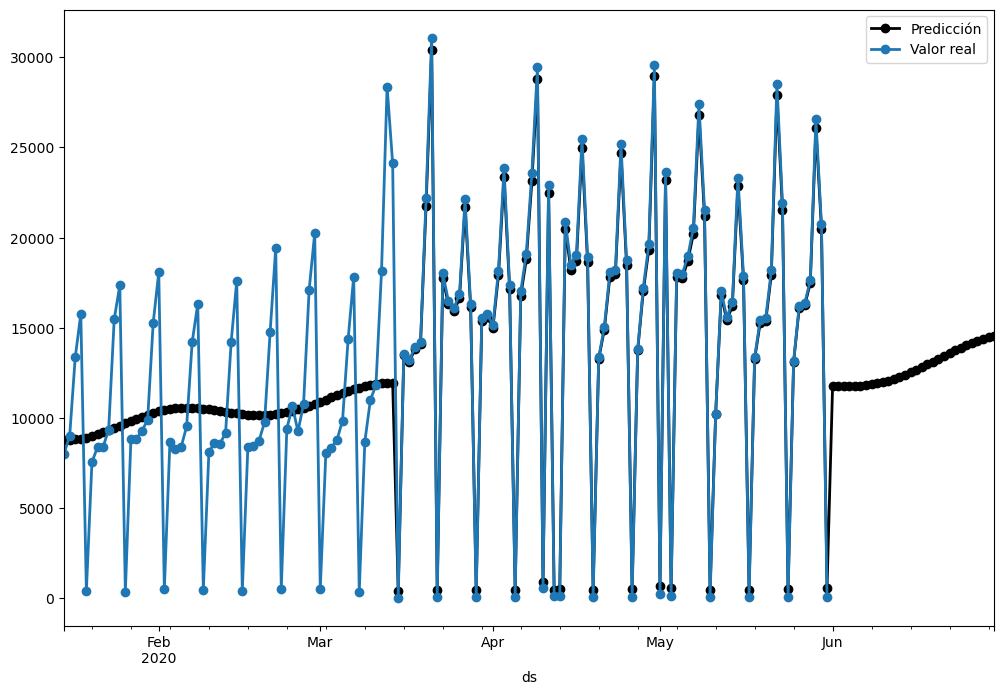

In [463]:
# Seleccionamos el período durante el confinamiento para las predicciones
prevision_zoom_covid = prevision_covid[(prevision_covid.ds >= '2020-01-15') & (prevision_covid.ds <= '2020-06-30')]

# Seleccionamos el período durante el confinamiento para los valores reales de las ventas
ventas_df_zoom_covid = df_cerveza[(df_cerveza.ds >= '2020-01-15') & (df_cerveza.ds <= '2020-06-30')]

# Creamos la figura para el gráfico
plt.figure(figsize=(12, 8))

# Representamos las predicciones durante el período de confinamiento
prevision_zoom_covid.set_index('ds')['yhat'].plot(label='Predicción', lw=2, marker='o', color='k')

# Representamos los valores reales durante el período de confinamiento
ventas_df_zoom_covid.set_index('ds')['y'].plot(label='Valor real', lw=2, marker='o')

# Agregamos la leyenda al gráfico
plt.legend();

Al incorporar las fechas del confinamiento por COVID-19 al modelo Prophet, este puede capturar mejor los efectos específicos de este evento en las ventas de cerveza. Al observar los picos durante el período de confinamiento, el modelo puede ajustar sus predicciones para reflejar más fielmente las fluctuaciones reales en los datos de ventas.

### Navidades

In [464]:
navidades = pd.DataFrame({
    'holiday': 'navidad',
    'ds': pd.to_datetime(['2017-12-22', '2018-12-22', '2019-12-22', '2020-12-22', '2021-12-22']),
    'lower_window': 0,
    'upper_window': 15,
})

In [465]:
fechas_especiales = pd.concat([covid, navidades])

In [466]:
# Creamos un nuevo modelo Prophet llamado modelo_covid_navidad, con la desactivación de la estacionalidad semanal,
# crecimiento lineal y la inclusión de fechas especiales para el confinamiento por COVID-19 y Navidad.
modelo_covid_navidad = Prophet(weekly_seasonality=False, growth='linear', holidays=fechas_especiales)

# Ajustamos el modelo a los datos históricos de ventas de cerveza representados en el DataFrame df_cerveza.
modelo_covid_navidad.fit(df_cerveza)

# Generamos un DataFrame futuro con fechas adicionales para realizar predicciones.
futuro_covid_navidad = modelo_covid_navidad.make_future_dataframe(periods=580)

20:42:19 - cmdstanpy - INFO - Chain [1] start processing
20:42:19 - cmdstanpy - INFO - Chain [1] done processing


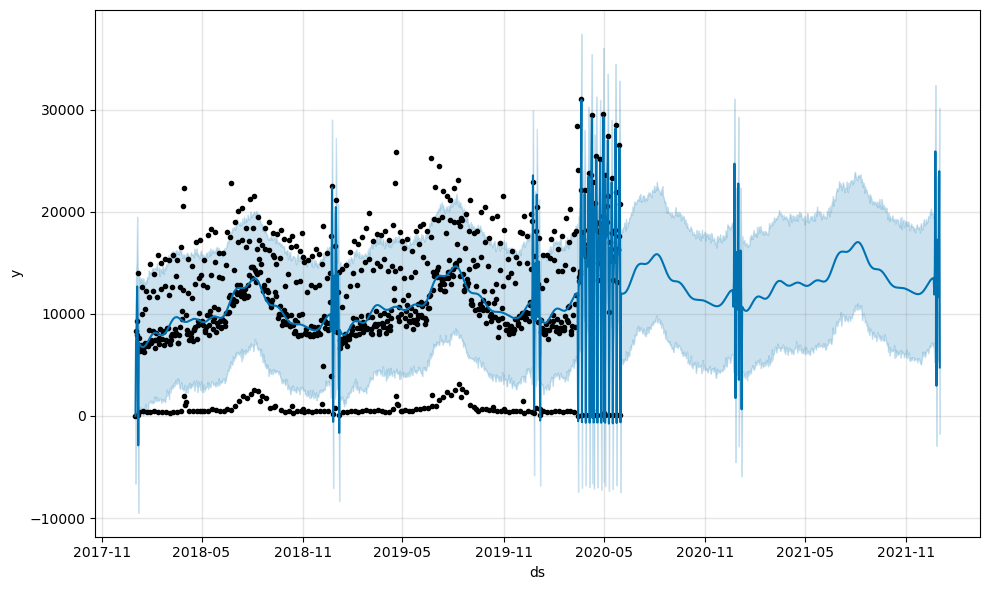

In [467]:
# Se generan predicciones utilizando el modelo Prophet ajustado para las fechas futuras contenidas en el DataFrame 'futuro'.
prevision_covid_navidad = modelo_covid_navidad.predict(futuro_covid_navidad)

# Se genera una visualización de las predicciones utilizando el método plot() del modelo Prophet.
modelo_covid_navidad.plot(prevision_covid_navidad);

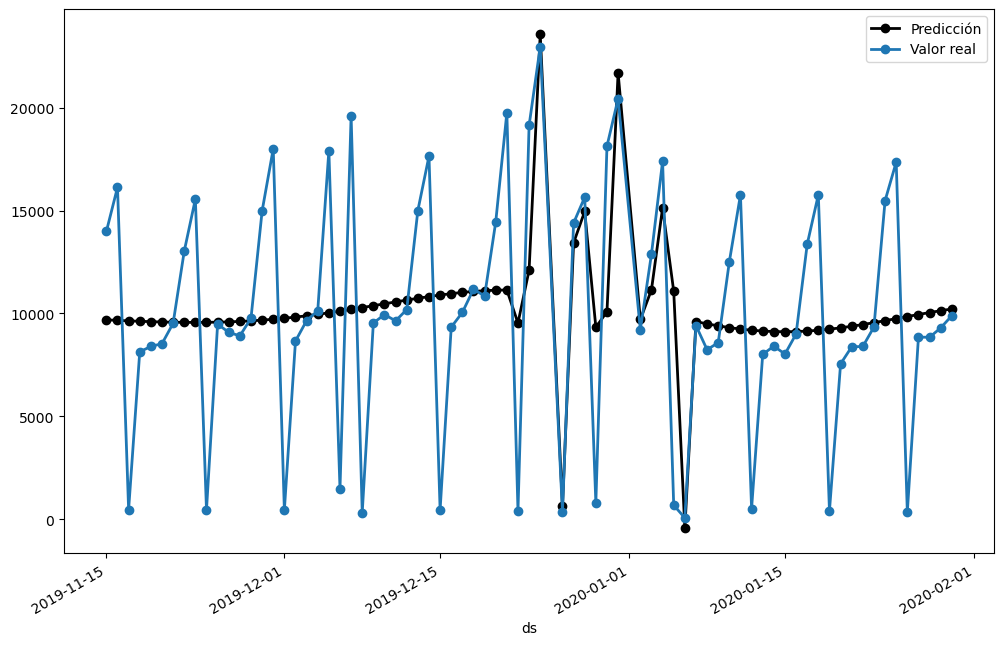

In [468]:
# Seleccionamos el período durante el confinamiento para las predicciones
prevision_zoom_navidad = prevision_covid_navidad[(prevision_covid_navidad.ds >= '2019-11-15') & (prevision_covid_navidad.ds <= '2020-01-30')]

# Seleccionamos el período durante el confinamiento para los valores reales de las ventas
ventas_df_zoom_navidad = df_cerveza[(df_cerveza.ds >= '2019-11-15') & (df_cerveza.ds <= '2020-01-30')]

# Creamos la figura para el gráfico
plt.figure(figsize=(12, 8))

# Representamos las predicciones durante el período de confinamiento
prevision_zoom_navidad.set_index('ds')['yhat'].plot(label='Predicción', lw=2, marker='o', color='k')

# Representamos los valores reales durante el período de confinamiento
ventas_df_zoom_navidad.set_index('ds')['y'].plot(label='Valor real', lw=2, marker='o')

# Agregamos la leyenda al gráfico
plt.legend();

Es cierto que,  aunque la inclusión de fechas especiales como el confinamiento por COVID-19 y Navidad mejora la precisión de las predicciones para esos períodos específicos, seguimos observando la presencia de picos que el modelo no logra capturar.

Esta situación sugiere que otros factores o eventos pueden estar influyendo en las ventas de cerveza y generando esos picos que no están siendo considerados por el modelo. Por lo tanto, vamos a estudiar el efecto de los fines de semana en las ventas de cerveza y considerar si la inclusión de esta información mejora la capacidad del modelo para capturar estos picos.

Además, es importante recordar que ningún modelo es perfecto y siempre habrá cierto grado de incertidumbre en las predicciones. Por lo tanto, es crucial interpretar las predicciones con precaución y utilizarlas como una herramienta complementaria en la toma de decisiones, en lugar de depender exclusivamente de ellas.

### Fines de semana

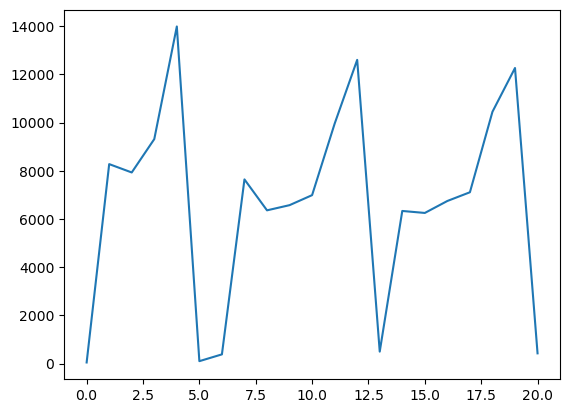

In [469]:
df_cerveza.y[:21].plot();

Esta breve representación de las primeras 3 semanas revela un patrón evidente: un aumento en el consumo de cerveza durante los fines de semana. Dado este hallazgo, es lógico y relevante que consideremos este factor en nuestro modelo.

Por lo tanto, vamos a incorporar la información sobre los fines de semana en nuestro modelo, ya que su inclusión puede mejorar significativamente la capacidad del modelo para capturar y predecir los picos de ventas asociados con estos días de la semana.

Es importante reconocer que esta mejora en la modelización nos permite reflejar con mayor precisión la realidad observada en los datos históricos, lo que fortalece la capacidad predictiva del modelo y proporciona una base más sólida para la toma de decisiones estratégicas en relación con las ventas de cerveza.

In [470]:
# Generar un rango de fechas desde 2018-01-01 hasta 2021-12-31
fechas = pd.date_range(start='2018-01-01', end='2021-12-31', freq='D')

# Filtrar solo los viernes
viernes = fechas[fechas.dayofweek == 5]

# Crear el DataFrame con las fechas de los viernes
fechas_viernes = pd.DataFrame({
    'holiday': 'viernes',
    'ds': viernes,
    'lower_window': 0,
    'upper_window': 2 # Se añade una ventana de 2 días para tener en cuenta todo el fin de semana.
})

In [471]:
fechas_especiales = pd.concat([covid, navidades, fechas_viernes])

In [472]:
modelo_covid_navidad_viernes = Prophet(weekly_seasonality=False, growth='linear', holidays=fechas_especiales)

modelo_covid_navidad_viernes.fit(df_cerveza)

futuro_covid_navidad_viernes = modelo_covid_navidad_viernes.make_future_dataframe(periods=580)

20:42:22 - cmdstanpy - INFO - Chain [1] start processing
20:42:23 - cmdstanpy - INFO - Chain [1] done processing


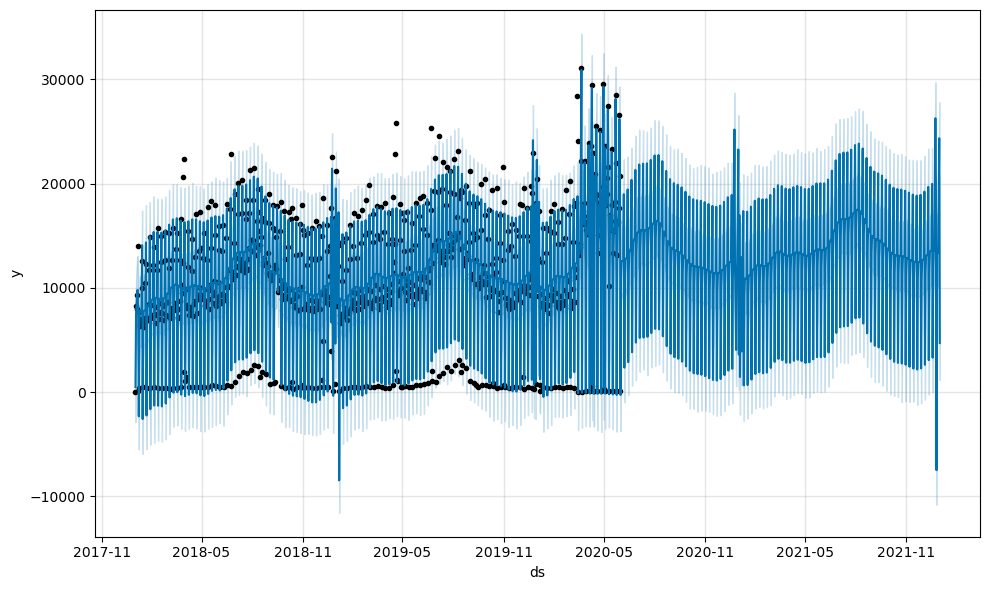

In [473]:
prevision_covid_navidad_viernes = modelo_covid_navidad_viernes.predict(futuro_covid_navidad_viernes)
modelo_covid_navidad_viernes.plot(prevision_covid_navidad_viernes);

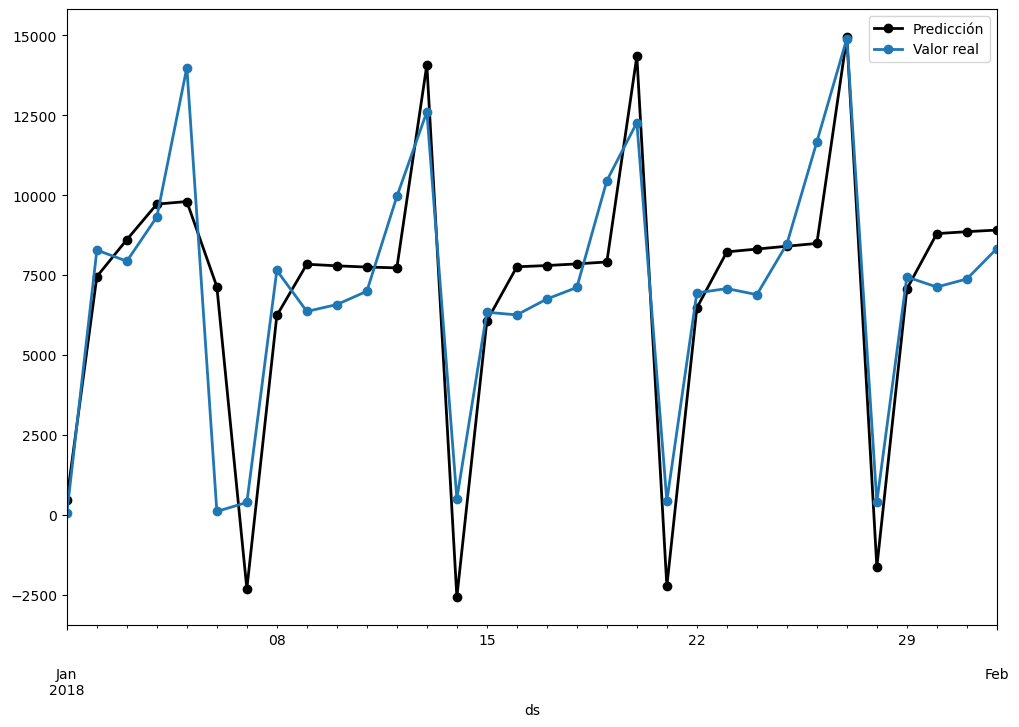

In [474]:
# Seleccionamos el período durante el confinamiento para las predicciones
prevision_zoom_viernes = prevision_covid_navidad_viernes[(prevision_covid_navidad_viernes.ds >= '2018-01-01') & (prevision_covid_navidad_viernes.ds <= '2018-02-01')]

# Seleccionamos el período durante el confinamiento para los valores reales de las ventas
ventas_df_zoom_viernes = df_cerveza[(df_cerveza.ds >= '2018-01-01') & (df_cerveza.ds <= '2018-02-01')]

# Creamos la figura para el gráfico
plt.figure(figsize=(12, 8))

# Representamos las predicciones durante el período de confinamiento
prevision_zoom_viernes.set_index('ds')['yhat'].plot(label='Predicción', lw=2, marker='o', color='k')

# Representamos los valores reales durante el período de confinamiento
ventas_df_zoom_viernes.set_index('ds')['y'].plot(label='Valor real', lw=2, marker='o')

# Agregamos la leyenda al gráfico
plt.legend();

### Final de la Champions

In [475]:
# Definir las fechas de las finales de la Champions League
fechas_finales_champions = pd.DataFrame({
    'holiday': 'champions',
    'ds': pd.to_datetime(['2018-05-26', '2019-06-01', '2020-08-23', '2021-05-29']),
    'lower_window': 0,
    'upper_window': 1
})

In [476]:
fechas_especiales = pd.concat([covid, navidades, fechas_viernes, fechas_finales_champions])

In [477]:
modelo_champions = Prophet(weekly_seasonality=False, growth='linear', holidays=fechas_especiales)

modelo_champions.fit(df_cerveza)

futuro_champions = modelo_champions.make_future_dataframe(periods=580)

20:42:27 - cmdstanpy - INFO - Chain [1] start processing
20:42:27 - cmdstanpy - INFO - Chain [1] done processing


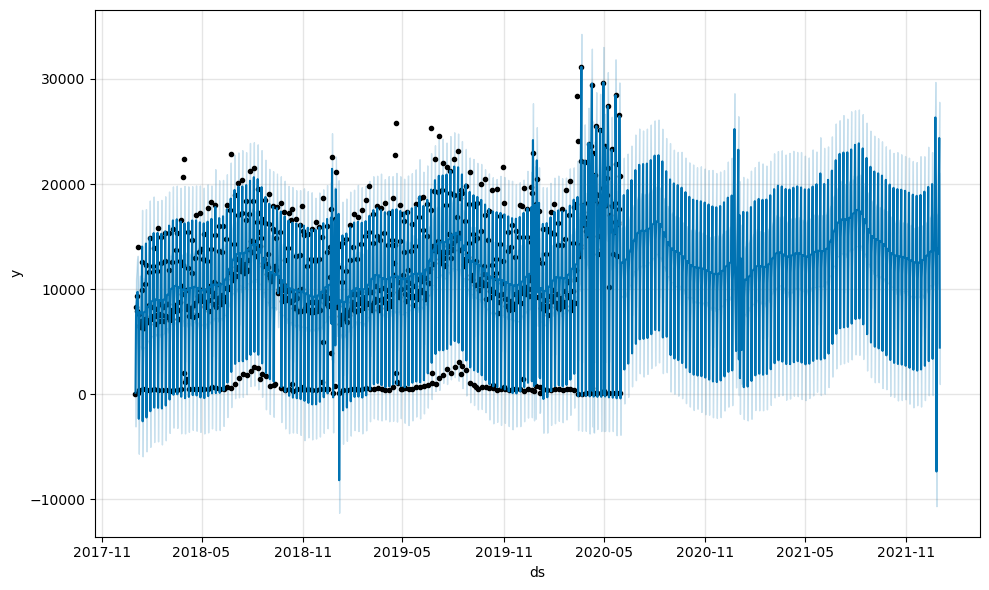

In [478]:
prevision_champions = modelo_champions.predict(futuro)
modelo_champions.plot(prevision_champions);

### Fiestas especiales

In [479]:
# Fechas de San Patricio en España desde 2018 hasta 2021
san_patricio = pd.DataFrame({
    'holiday': 'san_patricio',
    'ds': pd.to_datetime(['2018-03-17', '2019-03-17', '2020-03-17', '2021-03-17']),
    'lower_window': 0,
    'upper_window': 0
})

# Fechas de Oktoberfest en España desde 2018 hasta 2021
oktoberfest = pd.DataFrame({
    'holiday': 'oktoberfest',
    'ds': pd.to_datetime(['2018-09-22', '2019-09-22', '2020-09-22', '2021-09-22']),
    'lower_window': 0,
    'upper_window': 0
})


In [480]:
fechas_especiales = pd.concat([covid, navidades,fechas_finales_champions,fechas_viernes, san_patricio, oktoberfest])

In [481]:
modelo_fiestas = Prophet(weekly_seasonality=False, growth='linear', holidays=fechas_especiales)

modelo_fiestas.fit(df_cerveza)

futuro_fiestas = modelo_fiestas.make_future_dataframe(periods=580)

20:42:30 - cmdstanpy - INFO - Chain [1] start processing
20:42:30 - cmdstanpy - INFO - Chain [1] done processing


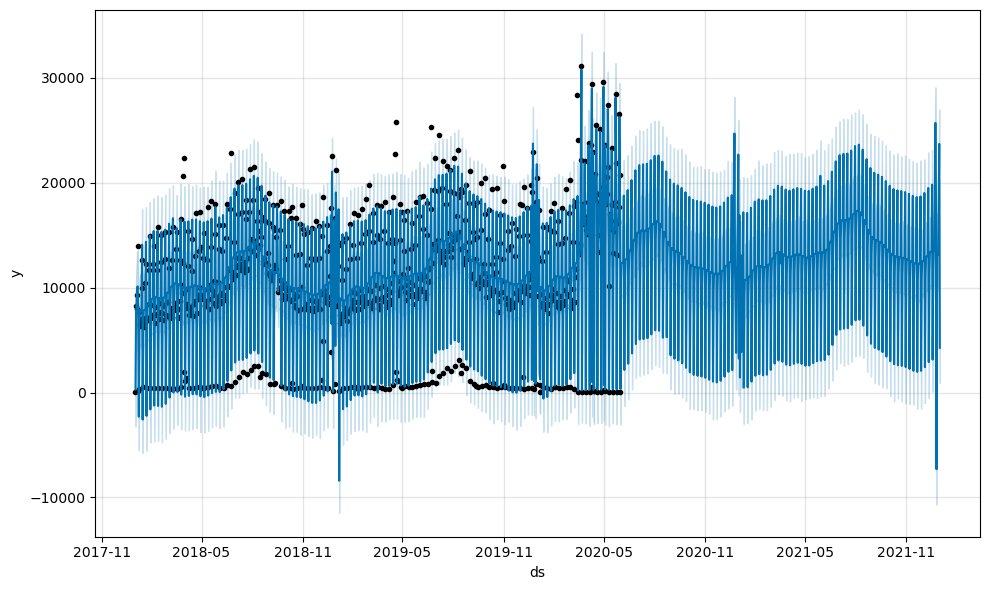

In [482]:
prevision_fiestas = modelo_fiestas.predict(futuro_fiestas)
modelo_fiestas.plot(prevision_fiestas);

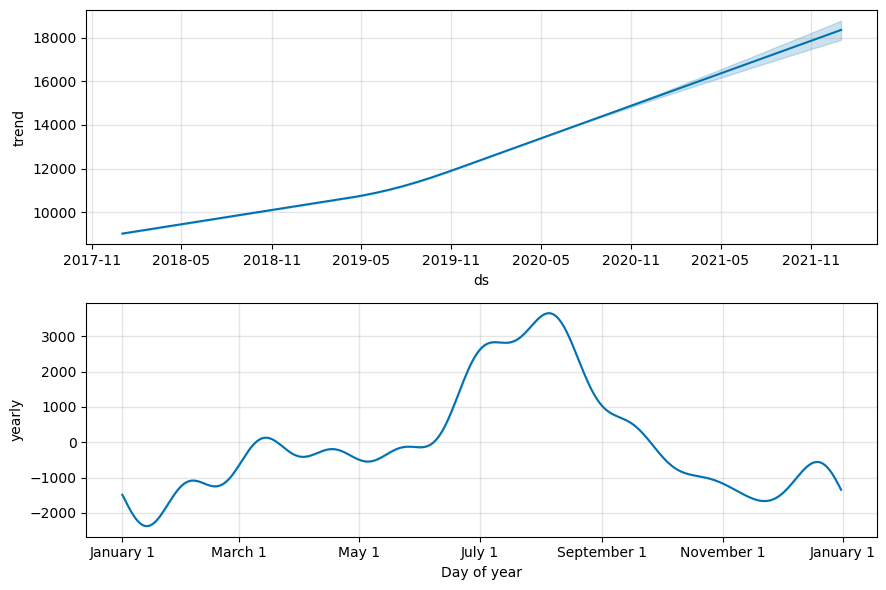

In [483]:
modelo_fiestas.plot_components(prevision);

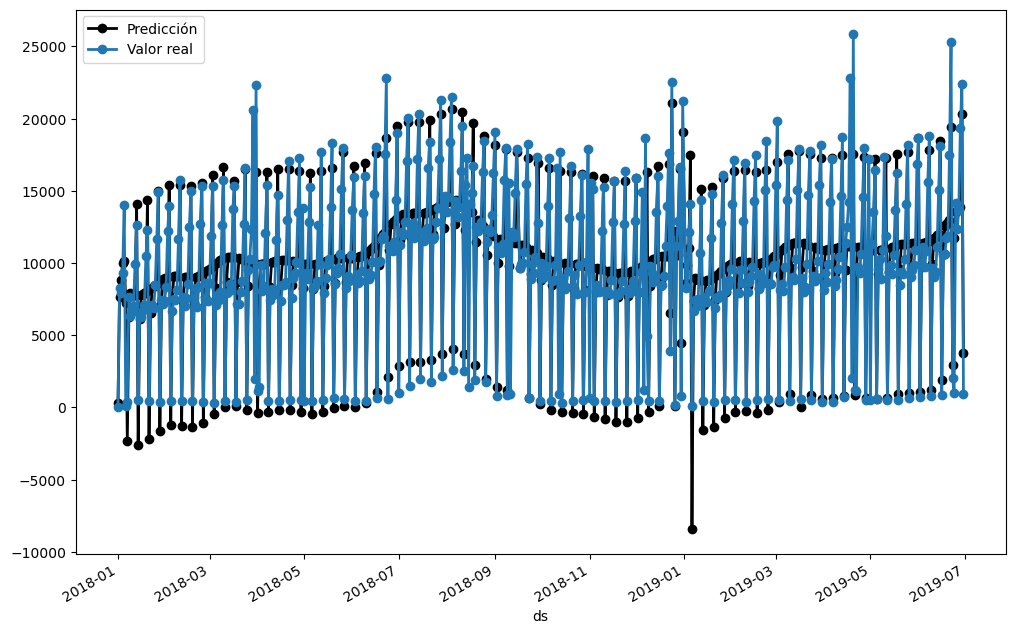

In [484]:
prevision_zoom = prevision_fiestas[(prevision_fiestas.ds >= '2018-01-01') & (prevision_fiestas.ds <= '2019-06-30')]
ventas_df_zoom = df_cerveza[(df_cerveza.ds >= '2018-01-01') & (df_cerveza.ds <= '2019-06-30')]
# representamos el valor real frente el predicho

plt.figure(figsize=(12, 8))
prevision_zoom.set_index('ds')['yhat'].plot(label='Predicción', lw=2, marker='o', color='k')
ventas_df_zoom.set_index('ds')['y'].plot(label='Valor real', lw=2, marker='o')

plt.legend();

### Verano

In [485]:
# Fechas del verano en España desde 2018 hasta 2021
verano = pd.DataFrame({
    'holiday': 'verano',
    'ds': pd.to_datetime(['2018-06-21', '2019-06-21', '2020-06-21', '2021-06-21']),
    'lower_window': 0,
    'upper_window': 92  # Consideramos el verano de aproximadamente 92 días, hasta el 21 de septiembre
})

In [486]:
fechas_especiales = pd.concat([covid, navidades,fechas_finales_champions,fechas_viernes, san_patricio, oktoberfest, verano])

In [487]:
modelo_verano = Prophet(weekly_seasonality=False, growth='linear', holidays=fechas_especiales)

modelo_verano.fit(df_cerveza)

futuro_verano = modelo_verano.make_future_dataframe(periods=580)

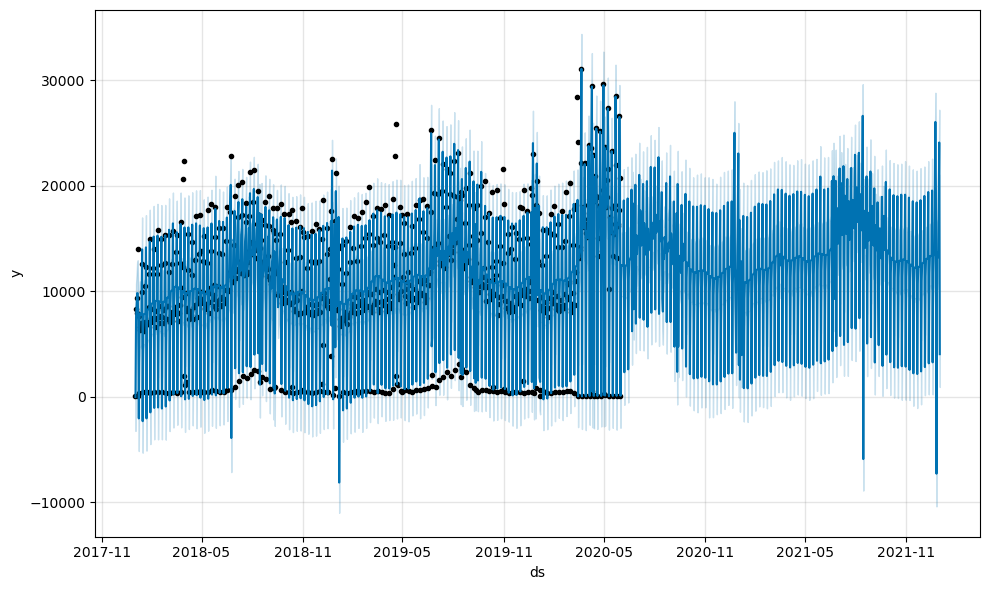

In [ ]:
prevision_verano = modelo_verano.predict(futuro_verano)
modelo_verano.plot(prevision_verano);

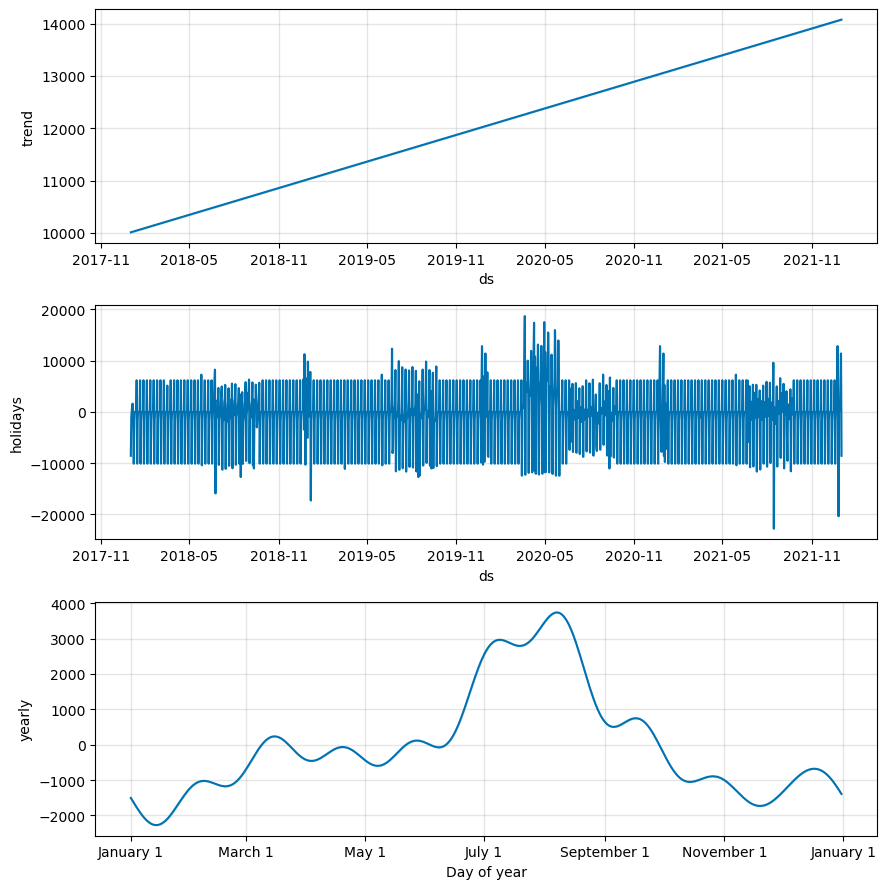

In [ ]:
modelo_verano.plot_components(prevision_verano);

## 6. Evaluación del modelo

En este caso de uso, es esencial que las predicciones de ventas no sean negativas, ya que no tiene sentido tener un número negativo de ventas en la realidad. Sin embargo, debido a la naturaleza del modelo y la complejidad de los datos, es posible que en ciertas ocasiones el modelo prediga valores negativos.

Para abordar este problema, vamos a aplicar una corrección a las predicciones posteriores a la generación de las mismas. Es decir, una vez que el modelo haya generado las predicciones, vamos a verificar si alguna de ellas es negativa y, en caso afirmativo, vamos a forzar que esa predicción sea igual a cero.

Esta corrección nos asegura que las predicciones sean siempre no negativas y más alineadas con la realidad de nuestro caso de uso. Es una forma de ajustar las predicciones del modelo para que sean más útiles y apropiadas para tu aplicación específica.

In [ ]:
prevision_verano["yhat"][prevision_verano["yhat"] < 0] = 0

/var/folders/tk/5h7vdghn3tj4wqcq0cts54dh0000gp/T/ipykernel_2103/1306882268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prevision_verano["yhat"][prevision_verano["yhat"] < 0] = 0


El error absoluto medio es de 1430.6410844243837


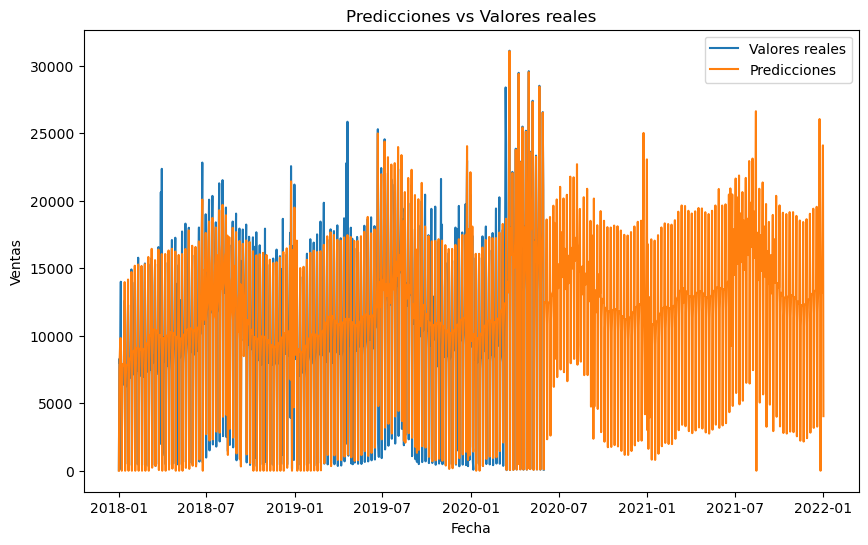

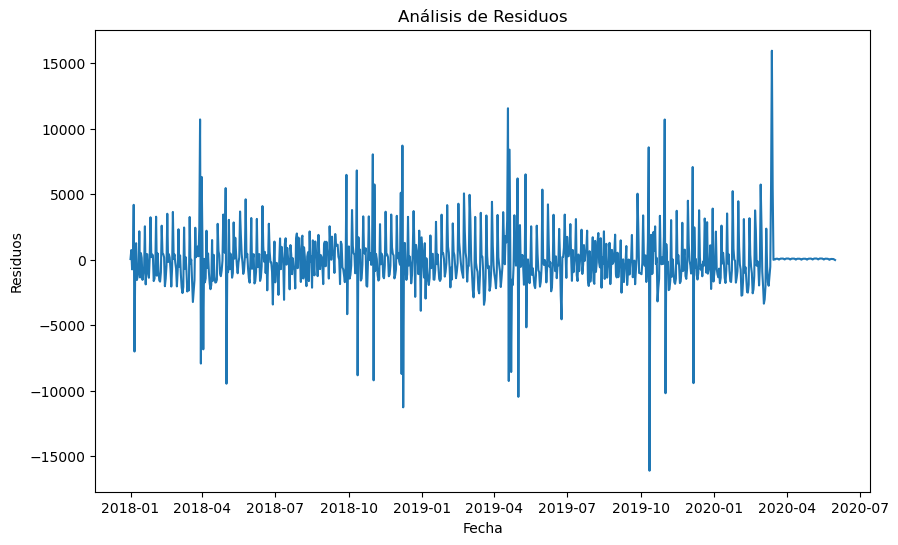

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calcula el error absoluto medio (MAE) 
y_true = df_cerveza['y']  # Valores reales
y_pred = prevision_verano['yhat'][:-580]  # Predicciones
mae = mean_absolute_error(y_true, y_pred)

print(f"El error absoluto medio es de {mae}")

# Grafica las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.plot(df_cerveza['ds'], df_cerveza['y'], label='Valores reales')
plt.plot(prevision_verano['ds'], prevision_verano['yhat'], label='Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Predicciones vs Valores reales')
plt.legend()
plt.show()

# Análisis de residuos
residuos = y_true - y_pred
plt.figure(figsize=(10, 6))
plt.plot(df_cerveza['ds'], residuos)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.show()